<a href="https://colab.research.google.com/github/PyBlin/Study/blob/main/PyML/Chapter4_Classification/Chap4_2_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Classification Intro

* Naive Bayes : 베이즈 통계와 생성 모델에 기반합니다.
* Logistic Regression : 독립변수와 종속변수의 선형 관계성에 기반합니다.
* Decision Tree : 데이터 균일도에 따른 규칙에 기반합니다.
* Support Vector Machine : 개별 클래스간의 최대 분류 마진을 효과적으로 찾아줍니다.
* Nearest Network : 근접 거리를 기준으로 합니다.
* Neural Network : 심층 연결을 기반으로 합니다.
* **Ensemble** : ML 알고리즘을 결합합니다. (기본적으로 Decision Tree)

>* Bagging
>>* Random Forest : 데이터 분석가가 애용합니다!
>>>* 뛰어난 예측 성능
>>>* 빠른 수행 시간

>* Boosting : 최신 트랜드입니다!!
>>* Gradient Boosting
>>>* 뛰어난 예측 성능
>>>* 느린 수행 시간
>>* XgBoost( eXtra Gradient Boost )
>>* LightGBM

>* Stacking

* 앙상블에서는 결정 트리의 과적합으로 인한 예측 성능 저하가 오히려 장점입니다.
* 앙상블은 여러 개의 약한 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시킵니다.
* 결정 트리가 약한 학습기이기 때문에 앙상블에 좋습니다.

# 2.Decision Tree

* Decision Node : 규칙 조건
* Leaf Node : 결정된 클래스 값
* Sub Tree : 새로운 조건마다 생성됨

* 정보 이득( Information Gain ) 지수
>* 엔트로피 개념을 기반으로 합니다.
>* `정보이득지수 = 1 - 엔트로피지수`
>* 결정 트리는 이 정보이득지수로 분할 기준을 결정합니다.
>* 즉, 정보이득이 높은 속성을 기준으로 분할합니다.

* 지니( Gini ) 계수
>* 0 : 가장 평등, 1 : 가장 불평등
>* ML에 적용될 지니계수가 낮을수록 데이터 균일도가 높습니다.
>* 즉, 지니계수가 낮은 속성을 기준으로 분할합니다.
>* DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터셋을 분할합니다.

* 한마디로 결정 트리는 정보이득이 높고, 지니계수가 낮은 조건을 찾아 반복적으로 분할합니다.

* 엔트로피란?
>* 주어진 데이터 집합의 혼잡도를 의미합니다.
>* 서로 다른 값이 섞여 있으면 엔트로피가 높습니다.
>* 같은 값이 섞여 있으면 엔트로피가 낮습니다.

## 2.1 Decision Tree Model 특징

* 장점
>* '균일도' 기반으로 쉽고 직관적입니다.
>* 시각화로 표현까지 가능합니다.
>* 정보의 '균일도'만 신경쓰면 되므로 전처리 작업이 필요 없습니다.

* 단점
>* 과적합( Overfitting )으로 정확도가 떨어집니다.
>* 서브 트리를 계속 만들다 보면 트리의 깊이가 커지고 복잡해집니다.
>* 복잡한 모델은 결국 실제 상황에 유연하게 대처할 수 없어 예측 성능이 떨어집니다.

* 해결책
>* 차라리 완벽한 규칙은 만들 수 없다고 인정하는 편이 더 좋습니다.
>* 즉, 트리의 크기를 사전에 제한하는 것이 성능 튜닝에 더 도움이 됩니다.

## 2.2 Decision Tree Parameter

* CART( Classification And Regression Trees ) 알고리즘 기반
>* Decision Tree Classifier
>* Decision Tree Regressor

* `min_samples_split=2`
>* 노드 분할을 위한 최소 샘플 데이터 수로, 과적합을 제어합니다.
>* 작을 수록 분할되는 노드가 많아져 과적합 가능성이 증가합니다.

* `min_samples_leaf=1`
>* 말단 노드( leaf )가 되기 위한 최소 샘플 데이터 수입니다.
>* `min_saples_split`와 유사하게 과적합을 제어하는 용도입니다.
>* 비대칭적( imbalanced ) 데이터의 경우 특정 클래스 데이터가 매우 작을 수 있으니 이 경우는 작게 설정합니다.

* `max_features=None`
>* 최대 피처 개수입니다.
>* default : 데이터셋의 모든 피처를 사용해 분할합니다.
>* int : 대상 피처의 개수입니다.
>* float : 전체 피처 중 대상 피처의 퍼센트입니다.
>* 'sqrt' : 전체 피처 중 sqrt만큼 선정합니다. = 'auto'
>* 'log' : 전체 피처 중 log2 선정합니다.

* `max_depth=None`
>* 트리의 최대 깊이입니다.
>* default : 완벽한 클래스 결정 값이 될 때까지 계속 분할하거나 노드의 데이터 개수가 `min_samples_split`보다 작아질 때까지 깊이가 증가합니다.
>* 깊어지면 `min_samples_split` 설정대로 과적합이 될 수 있으므로 적당한 값으로 제어합니다.

* `max_leaf_nodes`
>* 말단 노드( leaf )의 최대 개수입니다.

## 2.3 Decision Tree Model Visualization

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Decision Tree Classifire 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# iris data loading, 학습/테스트 데이터셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, 
                                                    iris_data.target, 
                                                    test_size=0.2, 
                                                    random_state=11)

# training
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [2]:
from sklearn.tree import export_graphviz

# out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, 
                filled=True)

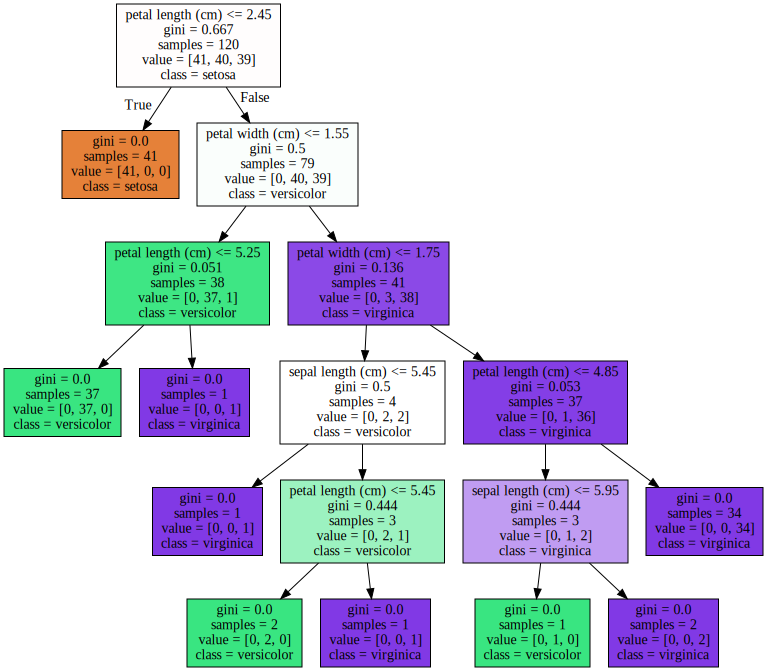

In [3]:
import graphviz

# 생성된 tree.dot 파일을 graphviz가 읽어서 주피터 노트북에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

* Leaf Node
>* 더 이상 자식 노드가 없는 노드입니다.
>* 최종 클래스(레이블) 값이 결정되는 노드입니다.
>* 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족해야 합니다.

* Branch Node
>* 자식 노드가 있는 노드입니다.
>* 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있습니다.

* 1번(0번?) 노드를 예시로 설명
>* petal length (cm) <= 2.45
>>* 피처의 조건으로, 자식 노드를 만들기 위한 규칙입니다.
>>* 없으면 리프 노드, 있으면 브랜치 노드입니다.
>* gini = 0.667
>>* 다음의 value = [ ]로 주어진 데이터 분포에서의 지니 계수입니다.
>* samples = 120
>>* 현 규칙에 해당하는 데이터 건수입니다.
>* value = [41, 40, 39]
>>* 클래스 값 기반의 데이터 건수입니다.
>>* 붓꽃 데이터셋은 클래스 값으로 0, 1, 2를 가지고 있습니다.
>>* 0( Setosa ), 1( Versicolor ), 2( Verginica )
>>* 순서대로 0이 41개, 1이 40개, 2가 39개입니다.

* 색깔
>* orange : Setosa( 0 )
>* green : Versicolor( 1 )
>* violet : Verginica( 2 )
>* 색이 짙어질수록 지니계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많습니다.

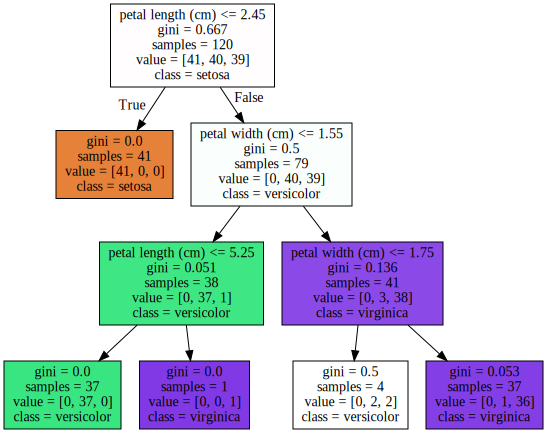

In [4]:
# max_depth=3

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz
import graphviz

dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, 
                                                    iris_data.target, 
                                                    test_size=0.2, 
                                                    random_state=11)

dt_clf.fit(X_train, y_train)
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, 
                filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* `max_depth=3`
>* 트리 깊이가 3으로 줄어들면서 더 간단해졌습니다.

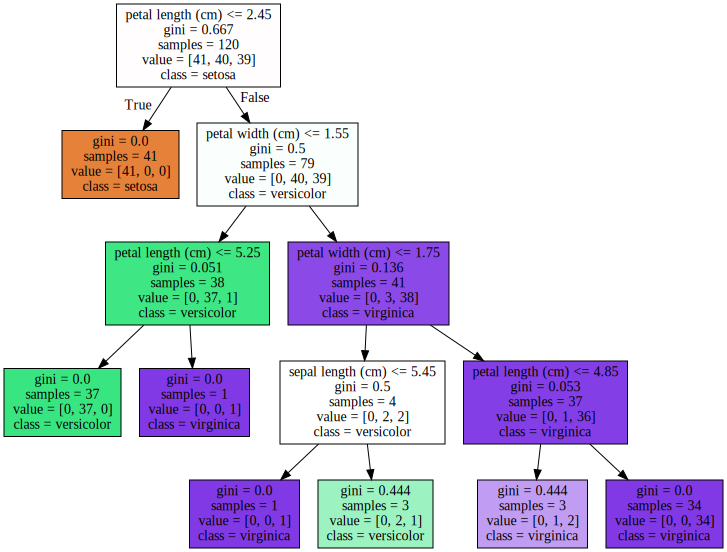

In [5]:
# min_samples_split=4

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz
import graphviz

dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split=4)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, 
                                                    iris_data.target, 
                                                    test_size=0.2, 
                                                    random_state=11)

dt_clf.fit(X_train, y_train)
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, 
                filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* `min_samples_split=4`
>* 자식 노드로 분할하기 위해 최소 샘플 개수가 4개 필요합니다.
>* 만약 4개 미만이면 분할을 멈추고 리프 노드가 됩니다.
>* 트리 깊이도 줄었고 더 간결해졌습니다.

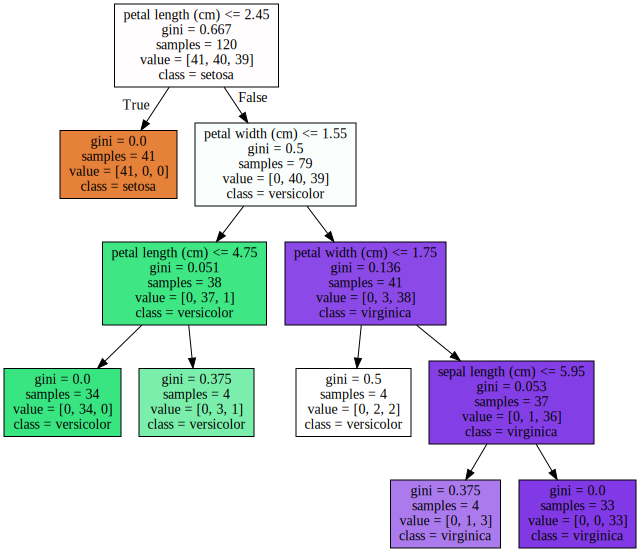

In [6]:
# min_samples_leaf=4

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz
import graphviz

dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=4)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, 
                                                    iris_data.target, 
                                                    test_size=0.2, 
                                                    random_state=11)

dt_clf.fit(X_train, y_train)
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, 
                filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* `min_samples_leaf=4`
>* 리프 노드가 될 수 있는 샘플 데이터 건수의 최소값입니다.
>* 샘플이 4 이하이면 리프 노드가 되기 때문에 분할을 멈춥니다.
>* 브랜치 노드가 줄어들고 더 간결하게 만들어집니다.

Feature importances : 
[0.00594727 0.         0.5459484  0.44810433]
sepal length (cm) : 0.006
sepal width (cm) : 0.000
petal length (cm) : 0.546
petal width (cm) : 0.448


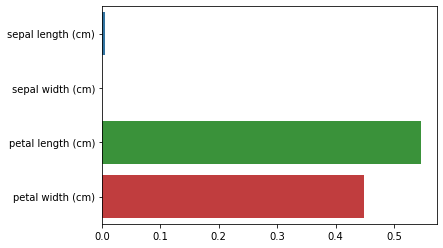

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
# print(f"Feature importances : \n{np.round(dt_clf.feature_importances_, 3)}")
print(f"Feature importances : \n{dt_clf.feature_importances_}")

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f"{name} : {value:.3f}")

# feature importance --> column 별 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names);

* `feature_importances_`
>* 결정 트리가 학습을 통해 규칙을 정할 때 중요한 역할 지표입니다.
>* ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당됩니다.
>* 첫 번째 피처의 중요도 : 0.59 %
>* 두 번째 피처의 중요도 : 0 %
>* 세 번째 피처의 중요도 : 54.59 %
>* 네 번째 피처의 중요도 : 44.81 %
>* 그래프로 봤을 때에도 petal length가 가장 피처 중요도가 높습니다.

## 2.4 Decision Tree Overfitting

* 사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 `make_classification()` 함수를 제공합니다.

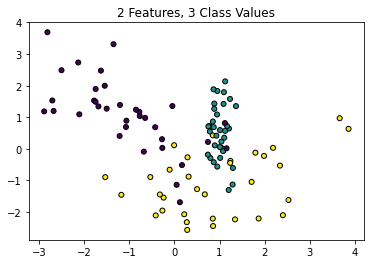

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('2 Features, 3 Class Values')

# 2차원 시각화를 위한 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, 
                                           n_informative=2, n_classes=3, 
                                           n_clusters_per_class=1, 
                                           random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화 (각 클래스 값은 다른 색으로)
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, 
            edgecolor='k');

In [9]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습
    model.fit(X, y)

    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), 
                         np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

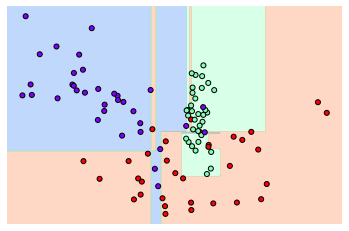

In [10]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 제약이 없는 결정 트리 학습 및 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

* 일부 이상치까지 분류하기 위해 결정 경계가 많아졌습니다.
* 이렇게 복잡한 모델은 예측 정확도가 떨어집니다.

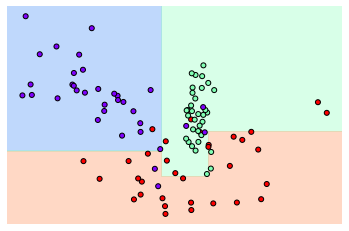

In [11]:
# min_samples_leaf=6
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

* 이상치에 크게 반응하지 않으면서 좀 더 일반화된 규칙에 따라 분류됐습니다.

## 2.5 Human Activity Recognition

* https://archive.ics.uci.edu/ml/machine-learning-databases/00240/

In [12]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [13]:
path = '/drive/MyDrive/Colab/ML_Study/Chapter4_Classification/human_activity/'

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# feature.txt 공백 분리 --> DataFrame
feature_name_df = pd.read_csv(path+'features.txt', sep='\s+', 
                              header=None, 
                              names=['column_index', 'column_name'])

# 피처명 index 제거 후 피처명만 리스트 객체로 생성하고 샘플 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print(f"전체 피처명에서 10개만 추출 : \n{feature_name[:10]}")

전체 피처명에서 10개만 추출 : 
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


* 인체의 움직임과 관련된 속성이 X, Y, Z축 값입니다.
* 현재 feature.txt 파일은 중복된 피처명이 있습니다.
* 현재 pandas 버전은 이를 허용하지 않습니다.
* 원본 피처명에 _1, _2 등을 추가한 후 DataFrame에 로드합니다.
* 먼저, 중복된 피처명을 확인합니다.

In [14]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


* 총 42개의 피처명이 중복됐습니다.
* 원본 피처명에 _1, _2를 추가로 부여해 새 피처명을 만들고 DataFrame을 반환하는 함수를 만들어 봅시다!

In [15]:
def get_new_feature_name_df(old_name):
    feature_dup_df = pd.DataFrame(data=old_name.groupby('column_name').cumcount(), 
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_name = pd.merge(old_name.reset_index(), feature_dup_df, how='outer')
    new_name['column_name'] = new_name[['column_name', 
                                        'dup_cnt']].apply(
                                            lambda x: x[0] + '_' + str(x[1]) 
                                            if x[1] > 0 else x[0], axis=1)
    new_name = new_name.drop(['index'], axis=1)
    return new_name

* 이제 학습용/테스트용 데이터셋을 불러옵니다.
* 역시나 공백 분리가 되어 있으니 잘 처리해줍니다.

In [16]:
import pandas as pd

# 이후 자주 사용되므로 함수로 생성 (레이블 칼럼 명은 'action')
def get_human_dataset():

    # 공백 분리 --> sep으로 할당
    feature_name_df = pd.read_csv(path+'features.txt', sep='\s+', 
                              header=None, 
                              names=['column_index', 'column_name'])
    
    # 중복된 피처명을 처리하는 함수를 이용해서 신규 DataFrame 생성
    new_name = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트도 변환
    feature_name = new_name.iloc[:, 1].values.tolist()

    # 학습/테스트 피처 데이터셋 로딩 (칼럼명은 feature_name 적용)
    X_train = pd.read_csv(path+'train/X_train.txt', sep='\s+', 
                          names=feature_name)
    X_test = pd.read_csv(path+'test/X_test.txt', sep='\s+', 
                         names=feature_name)
    
    # 학습/테스트 레이블 데이터셋 로딩 (칼럼명은 'action')
    y_train = pd.read_csv(path+'train/y_train.txt', sep='\s+', 
                          header=None, names=['action'])
    y_test = pd.read_csv(path+'test/y_test.txt', sep='\s+', 
                         header=None, names=['action'])
    
    # 학습/테스트 데이터셋 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

* 학습용 피처 데이터셋을 살펴봅시다.

In [17]:
print("### 학습 피처 데이터셋 ###")
X_train.info()

### 학습 피처 데이터셋 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


* 7352개의 레코드로, 561개의 피처가 있습니다.
* 모두 float 이므로 별도의 인코딩은 필요 없습니다.

In [18]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

* 레이블 값은 1, 2, 3, 4, 5, 6의 여섯 개 값입니다.
* 분포는 특정 값으로 왜곡되지 않고 비교적 고르게 분포됐습니다.
* ML 수행에 앞서, Decision Tree Classifier 디폴트의 하이퍼 파라미터를 추출해 봅시다!

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복할 때마다 동일한 예측 결과 도출을 위한 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"DT Prediction Accuracy : {acc:.4f}")

# Decision Tree Classifier 하이퍼 파라미터 추출
print(f"\nDTC 기본 하이퍼 파라미터 : \n{dt_clf.get_params()}")

DT Prediction Accuracy : 0.8548

DTC 기본 하이퍼 파라미터 : 
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


* 이번엔 GridSearchCV를 이용해 `max_depth` 값을 변화시키면서 예측 성능을 확인해 보겠습니다.
* 교차 검증은 5 세트로 합니다.
* 대략 2분 정도 걸립니다. (엔비디아 없음 ㅠㅠ)

In [20]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6, 8, 10, 12, 16, 20, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, 
                       verbose=1)
grid_cv.fit(X_train, y_train)
print(f"\nGridSearchCV 최고 평균 정확도 수치: {grid_cv.best_score_:.4f}")
print(f"GridSearchCV 최적 하이퍼 파라미터 : {grid_cv.best_params_}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.9min finished



GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 16}


* `max_depth=16`일 때 5개 폴드셋의 최고 평균 정확도가 85.13%로 나왔습니다.
* `cv_results_` 속성을 통해 `max_depth` 값에 따라 어떻게 예측 성능이 변하는지 확인해 보겠습니다.
* `mean_test_score` : 평가 데이터셋의 평균 정확도 수치입니다.

In [21]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 값과 해당 테스트/학습 데이터셋의 정확도 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


* 이번엔 별도의 테스트 데이터셋에서의 정확도를 측정해 보겠습니다.

In [22]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

# max_depth 값을 변화시키면서 그때마다 학습/테스트셋의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f"max_depth={depth} 정확도 : {acc*100:.2f} %")

max_depth=6 정확도 : 85.58 %
max_depth=8 정확도 : 87.07 %
max_depth=10 정확도 : 86.73 %
max_depth=12 정확도 : 86.46 %
max_depth=16 정확도 : 85.75 %
max_depth=20 정확도 : 85.48 %
max_depth=24 정확도 : 85.48 %


* `max_depth=8`일 때 정확도가 87.07%로 가장 높습니다.
* 8을 넘어가면서 정확도가 계속 감소합니다.
* 이제 `max_depth`와 `min_samples_split`을 같이 변경하면서 정확도 성능을 튜닝합시다!

In [23]:
params = {'max_depth':[8, 12, 16, 20], 'min_samples_split':[16, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, 
                       verbose=1)
grid_cv.fit(X_train, y_train)
print(f"\nGridSearchCV 최고 평균 정확도 수치: {grid_cv.best_score_:.4f}")
print(f"GridSearchCV 최적 하이퍼 파라미터 : {grid_cv.best_params_}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.3min finished



GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 16}


* `max_depth=8, min_samples_split=16`일 때 85.49%로 최고의 정확도입니다.
* 이번엔 별도로 분리된 테스트셋에 해당 하이퍼 파라미터를 적용해 보겠습니다.
* `best_estimator_` : 최적 하이퍼 파라미터인 `max_depth=8, min_samples_split=16`으로 학습이 완료된 Estimator 객체입니다.

In [24]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
acc = accuracy_score(y_test, pred1)
print(f"DT Prediction Accuracy : {acc:.4f}")

DT Prediction Accuracy : 0.8717


* `max_depth=8, min_samples_split=16`일 때 테스트셋 예측 정확도는 87.17%입니다.
* 마지막으로 각 피처의 중요도가 높은 순으로 Top 20 막대그래프로 표현해 봅시다!

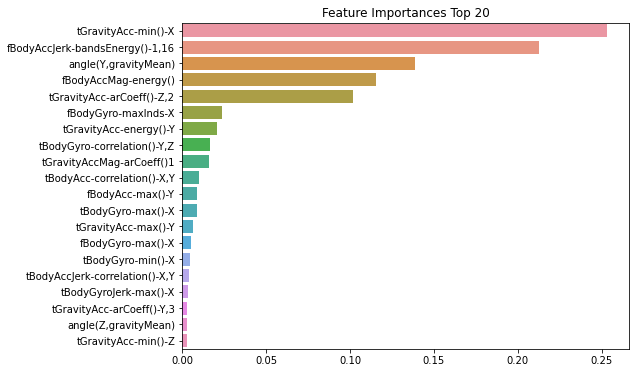

In [25]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# 중요도 정렬, seaborn 쉽게 표현 위해 Series 반환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

* Top 5 피처들이 매우 중요하게 규칙 생성에 영향을 미치고 있습니다.